# Bilibili Bullet Chat Analysis

data taken from Bilibili (creator: 戴师兄自学课程), bullet chat dated from August 2021 to December 2022

## Column Info

1. id = bullet chat id (each bullet chat has its own id)
2. progress = timeline of video when bullet chat is sent (millisecond)
3. content = bullet chat
4. ctime = bullet chat created time 
5. uid = encrypted user id

## 1. Data import

In [1]:
import pandas as pd

In [57]:
user_level = pd.read_excel('user_level.xlsx')

In [2]:
import os

In [3]:
os.listdir('./')

['.ipynb_checkpoints',
 '1、系统认识数据分析.xlsx',
 '2、EXCEL基础操作.xlsx',
 '3、Tableau数据可视化.xlsx',
 '4、SQL从入门到实战.xlsx',
 '5、Python.xlsx',
 'Untitled.ipynb',
 'user_level.xlsx',
 '【戴师兄】python弹幕分析の课程稿子.ipynb']

In [4]:
#put the excel files needed into an empty list
excel_list = []

for item in os.listdir('./'):
    
    if 'xlsx' in item and 'user_level' not in item:
        
        excel_list.append(item)
    
excel_list

['1、系统认识数据分析.xlsx',
 '2、EXCEL基础操作.xlsx',
 '3、Tableau数据可视化.xlsx',
 '4、SQL从入门到实战.xlsx',
 '5、Python.xlsx']

In [14]:
danmu = pd.DataFrame()


for item in excel_list:
    #read the excel file from the list created just now
    excel = pd.read_excel(item, converters = {'uid': str, 'id': str})
    
    #create a new column to differentiate the data source
    excel['video title'] = item
    
    #combine two data
    danmu = pd.concat([danmu, excel], axis = 0)
    
danmu

,id,progress,content,ctime,uid,video title
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx
...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx


In [13]:
danmu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28016 entries, 0 to 1253
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        28016 non-null  object
 1   progress  28016 non-null  int64 
 2   content   28014 non-null  object
 3   ctime     28016 non-null  int64 
 4   uid       27615 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


## 2. Time 

### 2.1 Data cleaning 

process *'ctime'* column to extract the proper datetime

In [15]:
from datetime import datetime

In [18]:
danmu['bullet_created_time'] = danmu['ctime'].map(datetime.fromtimestamp)
danmu['bullet_created_time'] #datetime 

0      2021-08-22 22:43:22
1      2021-08-23 07:27:06
2      2021-08-23 07:27:30
3      2021-08-23 09:56:52
4      2021-08-23 22:12:56
               ...        
1249   2022-12-22 00:46:10
1250   2022-12-22 00:46:17
1251   2022-12-24 19:19:54
1252   2022-12-24 19:20:02
1253   2022-12-31 19:42:05
Name: bullet_created_time, Length: 28016, dtype: datetime64[ns]

In [28]:
danmu['year'] = danmu['bullet_created_time'].map(lambda x : x.year)
danmu['month'] = danmu['bullet_created_time'].map(lambda x: x.month)
danmu['week'] = danmu['bullet_created_time'].map(datetime.isoweekday)
danmu['hour'] = danmu['bullet_created_time'].map(lambda x: x.hour)

In [29]:
danmu

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19


### 2.2 Time Analysis

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

**What is the trend of bullet chat as the time increase?**

In [32]:
danmu_year = danmu[danmu['year'] == 2022] #bullet chat in 2022
danmu_year

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour
119,955256697446334464,193596,26个人,1640966672,8925482694608335642,1、系统认识数据分析.xlsx,2022-01-01 00:04:32,2022,1,6,0
120,955258091952824320,333566,新年快乐,1640966838,8925482694608335642,1、系统认识数据分析.xlsx,2022-01-01 00:07:18,2022,1,6,0
121,957326648055242752,318384,语速正好,1641213429,3105945468129837519,1、系统认识数据分析.xlsx,2022-01-03 20:37:09,2022,1,1,20
122,958483048722579456,322386,课件PDF在哪,1641351283,-349731603797322061,1、系统认识数据分析.xlsx,2022-01-05 10:54:43,2022,1,3,10
123,958581356437020672,315713,楞,1641363002,-6327355589687884151,1、系统认识数据分析.xlsx,2022-01-05 14:10:02,2022,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19


#### 2.2.1 By month

count the number of bullet chat by month in 2022

<AxesSubplot:xlabel='month'>

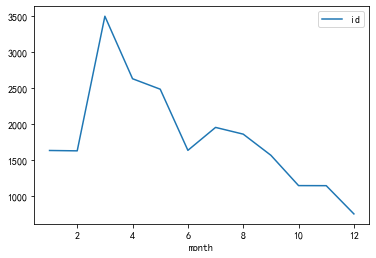

In [36]:
#group by month to see each month bullet chat count
danmu_year.groupby('month')[['id']].count().plot()

**bullet chat peaks in March 2022, and drastically decrease after March** <br>
ATP this does not means many users are active in March as one user can post many bullet chat

**advise**: 
- analyse the number of unique users

<AxesSubplot:xlabel='month'>

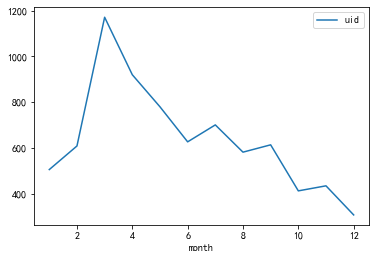

In [38]:
danmu_year.groupby('month')[['uid']].nunique().plot() #count the number of unique user id 

**This proves:** 

March 2022 has the highest number of unique user posting bullet chat

Assumptions:
- Season? 
- Holiday break? 
- Holiday just ends? 
- Exposure given by Bilibili is high?

*(Assumptions are to be proven if we have the data which unfortunately we don't have)*

#### 2.2.2 By day in week
count the number of bullet chat by day of the week in 2022

<AxesSubplot:xlabel='week'>

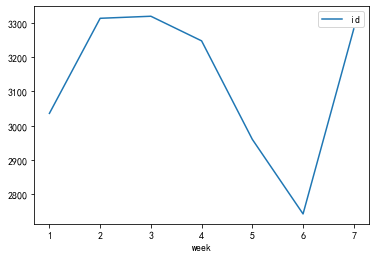

In [39]:
danmu_year.groupby('week')[['id']].count().plot()

<AxesSubplot:xlabel='week'>

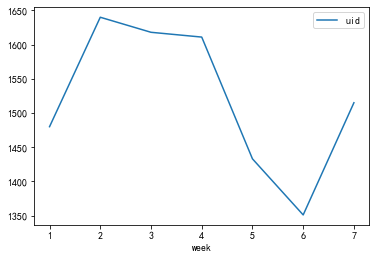

In [41]:
danmu_year.groupby('week')[['uid']].nunique().plot() 

**Interesting view:**
- Bullet chat is active during working day
- The number of bullet chat is decreasing from Thursday, which reach the lowest on Saturday (off day from work) <br>
- The number of bullet chat on Monday to Thursday is higher than Friday and Saturday

Assumptions:
- Users spend Friday and Saturday on entertainment, and Sunday is spent to catch back the progress
- Weekdays (Monday to Thursday) are spent on learning (could be after work or school during night)

<AxesSubplot:xlabel='week,hour'>

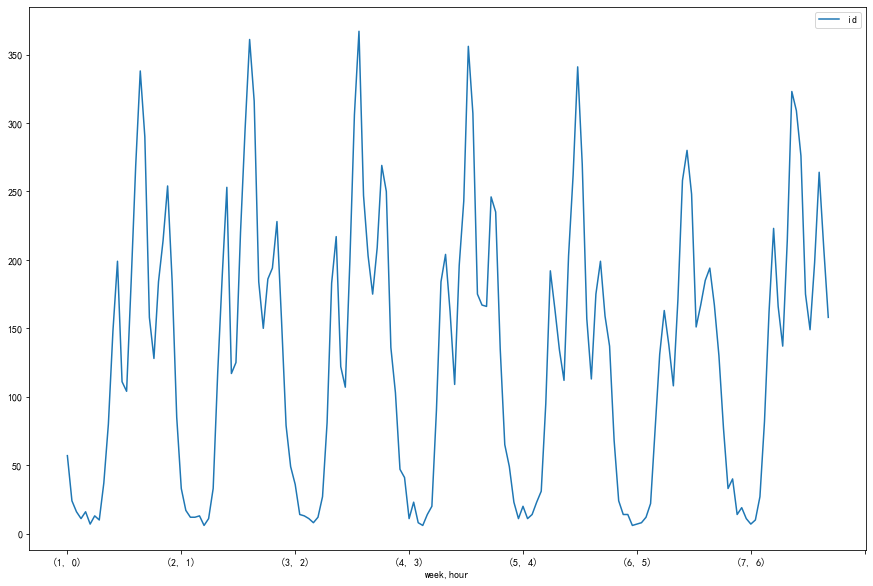

In [53]:
danmu_year.groupby(['week','hour'])[['id']].count().plot(figsize = (15, 10))

**This proves:**
    
- The distribution of bullet chat from day to night everyday is more or less the same (focus on afternoon), except on Saturday which the number of bullet chat is lower than the other days

- Watching video during working hour/ school time and at night

#### Conclusion:

1. from month: March gain the highest number of bullet chat (March possibly gained extra exposure from Bilibili) 
2. from week: 
- Monday, everyone focusses on work or school; 
- Tuesday & Wednesday & Thursday, watching video during school or work or at night;
- Friday & Saturday: Entertainment
- Sunday: back to learning
3. from hour: bullet chat peaks at morning, noon, and night (which tells the user could be employees or students)

## 3. User infographic 

1. what kind of bullet chat content is posted by the user?
2. what are their user level?

### 3.1 Data Cleaning

In [54]:
danmu['num_bullet_chat'] = danmu.groupby('uid')['id'].transform('count')
danmu

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour,num_bullet_chat
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0


In [60]:
user_level['uid'] = user_level['uid'].astype(str)

In [62]:
danmu_level = pd.merge(danmu, user_level, on = 'uid', how = 'inner')
danmu_level

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour,num_bullet_chat,level
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0,5
1,54982927380083200,4137203,2,1631962811,4658843910516903647,2、EXCEL基础操作.xlsx,2021-09-18 19:00:11,2021,9,6,19,2.0,5
2,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0,0
3,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0,0
4,53850829626031616,1931,打卡,1629803506,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-24 19:11:46,2021,8,2,19,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27610,1192131213687832320,4408637,终于毕业辣！,1669204315,-2335781148162268958,5、Python.xlsx,2022-11-23 19:51:55,2022,11,3,19,1.0,0
27611,1193489428359011584,4393601,完结，感谢师兄！,1669366226,2218640609761978448,5、Python.xlsx,2022-11-25 16:50:26,2022,11,5,16,2.0,5
27612,1193489958695060736,4433441,废了废了,1669366290,2218640609761978448,5、Python.xlsx,2022-11-25 16:51:30,2022,11,5,16,2.0,5
27613,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0,4


### 3.2 User Analysis

#### 3.2.1 Bullet Chat Content

count the number of bullet chat posted by each uid 

In [65]:
danmu_level.groupby('uid')[['id']].count().sort_values('id', ascending = False)

,id
uid,
6653485828143602809,214
6812827409839048297,187
-3260951504495839240,176
7975574863793804658,130
-5461449000341941986,102
...,...
-8446399402889408388,1
-8445271993221121197,1
-8444651956084190909,1


In [67]:
pd.set_option('display.max_rows', 300)

danmu_level[danmu_level['uid'] == '6653485828143602809']

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour,num_bullet_chat,level
6874,1117359445828237312,239856,因为原来已经有了一个名称相同的表格了，只不过被师兄隐藏了,1660290825,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 15:53:45,2022,8,5,15,214.0,6
6875,1117365973087926528,577767,我有，需要付费,1660291603,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:06:43,2022,8,5,16,214.0,6
6876,1117367556588805888,702844,商品交易总额,1660291792,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:09:52,2022,8,5,16,214.0,6
6877,1117368003449593600,753890,平台抽成 总部抽成 工资。。。,1660291845,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:10:45,2022,8,5,16,214.0,6
6878,1117368718981354752,813715,黑心商家只做外卖,1660291931,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:12:11,2022,8,5,16,214.0,6
6879,1117368836069266176,827663,小作坊是这样的,1660291945,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:12:25,2022,8,5,16,214.0,6
6880,1117372758867599616,981734,前面的，没错的,1660292412,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:20:12,2022,8,5,16,214.0,6
6881,1118055524727096576,1685696,我数据透视表直接复制行吗,1660373804,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 14:56:44,2022,8,6,14,214.0,6
6882,1118063929684269568,1958460,wo shu ju tou shi biao bu pei yong you xing ming,1660374806,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 15:13:26,2022,8,6,15,214.0,6
6883,1118066264124986368,2044789,基础可是不会能难死一方人,1660375085,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 15:18:05,2022,8,6,15,214.0,6


**The most active user had posted 214 bullet chain**

#### 3.2.2 User level

count the total number of bullet chat posted by each user level

<AxesSubplot:xlabel='level'>

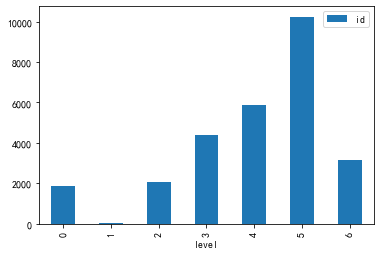

In [70]:
danmu_level.groupby('level')[['id']].count().plot(kind = 'bar')

**Phenomena:**
    
- Most of the bullet chat come from user level of 4 and 5
- User level 6 in Bilibili is not many but the number of bullet chat is still considered a lot for this channel
- The one who posted bullet chat in this channel are the one with high user stickiness in Bilibili

<AxesSubplot:xlabel='level'>

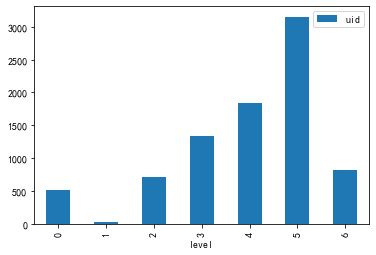

In [73]:
#count how many bullet chat posted by each unique user 
danmu_level.groupby('level')[['uid']].nunique().plot(kind = 'bar')

- The distribution is almost the same, just that the number of user level 6 is more than user level 2
- It shows number of user level 0 and 6 are limited while the other are well distributed 两头窄，中间宽

#### Conclusion:

1. video audience are mostly from user level 4 and 5, which shows the creator's fans could be the Bilibili users that are with very high stickiness and activeness

## 4. Video Content

### 4.1 Data Cleaning

In [74]:
from time import strftime
from time import gmtime

In [75]:
danmu['progress'] = danmu['progress']/1000

In [81]:
#gmtime result = year, month, day, hr, min, sec, day of the week, day of the year
#use strftime to extract hr, min, sec
danmu['video_progress'] = danmu['progress'].map(lambda x: strftime('%H:%M:%S', gmtime(x)))

In [90]:
#take the time by minute where bullet chat is posted 
#we do not want to display the chart in second as the visualization will be difficult to understand
danmu['video_progress_min'] = danmu['video_progress'].str[:5]

In [91]:
danmu

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour,num_bullet_chat,video_progress,video_progress_min
0,53766889040208384,2.691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0,00:00:02,00:00
1,53783364377004544,9.193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0,00:00:09,00:00
2,53783376819848704,23.017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0,00:00:23,00:00
3,53788075865425920,31.033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0,00:00:31,00:00
4,53811230195500032,68.093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0,00:01:08,00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404.199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0,01:13:24,01:13
1250,1212573101313764864,4412.898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0,01:13:32,01:13
1251,1214583153063240704,4407.770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0,01:13:27,01:13
1252,1214583220188773888,4414.000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0,01:13:34,01:13


### 4.2 Video Analysis

#### 4.2.1 '1、系统认识数据分析.xlsx'

In [95]:
p1 = danmu[danmu['video title'] == '1、系统认识数据分析.xlsx']

In [97]:
p1.groupby('video_progress_min')[['id']].count().sort_values('id', ascending = False)
#we can then check the video by the minute progress to see why the number of bullet chat

,id
video_progress_min,
00:29,244
00:00,128
00:11,100
00:09,88
00:15,85
00:24,85
00:28,79
00:01,77
00:03,76


**Phenomena:**
    
- The intro and outro have the highest number of bullet chat which is normal as users tend to post bullet chat like '完结撒花', 'hello', etc.
- 00:09 the creator asked question, so the users answer, hence the high number of bullet chat

In [99]:
p1[p1['video_progress_min'] == '00:11']

,id,progress,content,ctime,uid,video title,bullet_created_time,year,month,week,hour,num_bullet_chat,video_progress,video_progress_min
467,54538390004170240,683.024,正在看的小伙伴举个手呀,1631114923,4287605311228341710,1、系统认识数据分析.xlsx,2021-09-08 23:28:43,2021,9,3,23,1.0,00:11:23,00:11
468,54614344568386048,695.103,举手,1631259795,-1628569071256015389,1、系统认识数据分析.xlsx,2021-09-10 15:43:15,2021,9,5,15,3.0,00:11:35,00:11
469,54655814497023488,702.582,1,1631338893,-1367667807228799785,1、系统认识数据分析.xlsx,2021-09-11 13:41:33,2021,9,6,13,1.0,00:11:42,00:11
470,54721008270816256,713.449,1,1631463240,-296757868499160289,1、系统认识数据分析.xlsx,2021-09-13 00:14:00,2021,9,1,0,1.0,00:11:53,00:11
480,55127660746605568,705.966,1,1632238868,-6542834790891478612,1、系统认识数据分析.xlsx,2021-09-21 23:41:08,2021,9,2,23,1.0,00:11:45,00:11
482,55160558195541504,693.326,举手,1632301615,7815453928319057398,1、系统认识数据分析.xlsx,2021-09-22 17:06:55,2021,9,3,17,2.0,00:11:33,00:11
483,55249734176776704,677.565,红红火火恍恍惚惚,1632471704,4911477121964877228,1、系统认识数据分析.xlsx,2021-09-24 16:21:44,2021,9,5,16,2.0,00:11:17,00:11
485,55324748334235136,697.368,我我我,1632614783,-2332941944077862983,1、系统认识数据分析.xlsx,2021-09-26 08:06:23,2021,9,7,8,6.0,00:11:37,00:11
486,55324751524026880,706.511,嘎嘎嘎,1632614789,-2332941944077862983,1、系统认识数据分析.xlsx,2021-09-26 08:06:29,2021,9,7,8,6.0,00:11:46,00:11
487,55375446866020352,708.501,哒啦啦~,1632711482,1428966444445166747,1、系统认识数据分析.xlsx,2021-09-27 10:58:02,2021,9,1,10,1.0,00:11:48,00:11


- as for 00:11, user 4287605311228341710 purposely led the other by asking '正在看的小伙伴举个手呀', and other replied them

#### 4.2.2 '2、EXCEL基础操作.xlsx'

In [100]:
p2 = danmu[danmu['video title'] == '2、EXCEL基础操作.xlsx']
p2.groupby('video_progress_min')[['id']].count().sort_values('id', ascending = False)

,id
video_progress_min,
03:07,1277
03:06,570
00:58,406
03:20,322
03:21,302
00:00,191
01:09,163
00:39,154
01:08,143


- 03:06 and 03:07 shows the users are satiesfied with the creator's content, most of the bullet chats are saying "thank you"

#### 4.2.3 '3、Tableau数据可视化.xlsx'

In [101]:
p3 = danmu[danmu['video title'] == '3、Tableau数据可视化.xlsx']
p3.groupby('video_progress_min')[['id']].count().sort_values('id', ascending = False)

,id
video_progress_min,
02:48,189
00:57,177
02:47,177
01:15,79
00:00,75
00:58,73
00:05,62
01:42,58
00:59,58


**Phenomena:**

- outro has the highest number of bullet chat
- creator was having a screen freeze at 00:57, hence the number of bullet chat 

#### 4.2.4 '4、SQL从入门到实战.xlsx'

In [102]:
p4 = danmu[danmu['video title'] == '4、SQL从入门到实战.xlsx']
p4.groupby('video_progress_min')[['id']].count().sort_values('id', ascending = False)

,id
video_progress_min,
03:54,236
03:53,116
01:09,103
00:00,98
00:45,92
03:05,85
03:04,81
01:05,77
01:06,77


**Phenomena:**

- outro has the highest and second highest number of bullet chat
- a question arised at 01:09, each user has different opinion

#### 4.2.5 '5、Python.xlsx'

In [103]:
p5 = danmu[danmu['video title'] == '5、Python.xlsx']
p5.groupby('video_progress_min')[['id']].count().sort_values('id', ascending = False)

,id
video_progress_min,
01:13,117
00:21,99
00:00,60
00:01,52
00:17,43
00:05,30
00:06,28
00:20,28
00:08,27


**Phenomena:**

- outro has the highest number of bullet chat
- a funny video is played at 00:21 which increases the number of bullet chat

#### Conclusion
1. video with good content is welly recognized by the user
2. knowledge-based video effectiveness can be measured by the activeness of bullet chat